In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# read train and test data as datasets 
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
X = train.drop(["Id", "SalePrice"], axis = 1)
Y = train["SalePrice"]

In [5]:
# explore train and test dataset
print(f"train shape = {train.shape}")
print(f"test shape : {test.shape}")
print(train.describe())

train shape = (1460, 81)
test shape : (1459, 80)
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.2

In [6]:
#split to train and development sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

LotFrontage     18.590998
Alley           93.542074
MasVnrType      57.729941
MasVnrArea       0.293542
BsmtQual         2.544031
BsmtCond         2.544031
BsmtExposure     2.544031
BsmtFinType1     2.544031
BsmtFinType2     2.544031
Electrical       0.097847
FireplaceQu     47.651663
GarageType       5.283757
GarageYrBlt      5.283757
GarageFinish     5.283757
GarageQual       5.283757
GarageCond       5.283757
PoolQC          99.510763
Fence           80.234834
MiscFeature     96.086106
dtype: float64


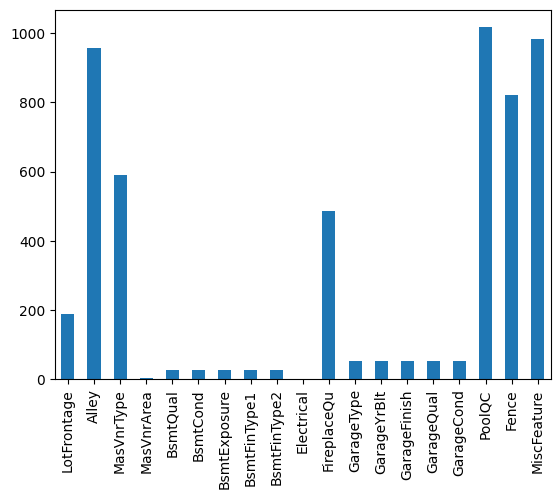

In [7]:
# check for missing values
missing = x_train.isnull().sum()
missing = missing[missing > 0]
null_percentage = missing/x_train.shape[0]* 100
missing.plot.bar()
print(null_percentage)

In [8]:
x_train["Alley"].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [9]:
x_train["PoolQC"].unique()

array([nan, 'Ex', 'Gd', 'Fa'], dtype=object)

In [10]:
x_train["Fence"].unique()

array(['MnPrv', nan, 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [11]:
x_train["MiscFeature"].unique()

array([nan, 'Shed', 'Othr', 'Gar2', 'TenC'], dtype=object)

In [12]:
# check for categorical and numerical columns
categorical = [f for f in x_train.columns if x_train.dtypes[f] == "object"]
print(f"categorical columns are:\n{categorical}")
print("################################################")
numerical = [f for f in x_train.columns if x_train.dtypes[f] != "object"]
print(f"numerical columns are:\n{numerical}")

categorical columns are:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
################################################
numerical columns are:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGr

In [13]:
#encode categorical values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Convert the datatype of categorical columns to category
for col in categorical:
    x_train[col] = x_train[col].astype("category")
    
# Convert the datatype of numerical columns to float32
for col in numerical:
    x_train[col] = x_train[col].astype("float32")
    
#columns for ordinal encoding
ordinal_columns = [col for col in categorical if 'Q'  in col]
print(ordinal_columns)
# Columns for one-hot encoding
one_hot_columns = [col for col in categorical if col not in ordinal_columns]


# Define the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missed')),  # Fill missing with "missed"
            ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        ]), ordinal_columns),
        ('onehot', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missed')),  # Fill missing with "missed"
            ('encoder', OneHotEncoder(drop='first',handle_unknown="ignore", sparse = False))
        ]), one_hot_columns),
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),# Fill missing with 0
            ("scaler", MinMaxScaler()),
            ("po",PowerTransformer(method='yeo-johnson'))
        ]), numerical)
    ]
)


preprocessor.fit(x_train)
x_train_transformed = preprocessor.transform(x_train)
x_test_transformed =  preprocessor.transform(x_test)

# Convert the result back to a DataFrame if needed
x_train_transformed = pd.DataFrame(x_train_transformed, columns=preprocessor.get_feature_names_out())
x_test_transformed = pd.DataFrame(x_test_transformed, columns=preprocessor.get_feature_names_out())

['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'PoolQC']


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [10, 14, 15, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [14]:
x_test_transformed.head()

,ord__ExterQual,ord__BsmtQual,ord__HeatingQC,ord__KitchenQual,ord__FireplaceQu,ord__GarageQual,ord__PoolQC,onehot__MSZoning_FV,onehot__MSZoning_RH,onehot__MSZoning_RL,...,num__GarageArea,num__WoodDeckSF,num__OpenPorchSF,num__EnclosedPorch,num__3SsnPorch,num__ScreenPorch,num__PoolArea,num__MiscVal,num__MoSold,num__YrSold
0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,0.0,0.0,1.0,...,-1.022914,1.089340,-0.989690,-0.394175,-0.130059,-0.303112,-0.070117,-0.201825,-1.771347,-1.427196
1,2.0,0.0,0.0,2.0,4.0,4.0,3.0,0.0,0.0,1.0,...,1.125574,1.058550,0.059491,-0.394175,-0.130059,-0.303112,-0.070117,-0.201825,-0.884128,1.563245
2,3.0,3.0,2.0,3.0,2.0,4.0,3.0,0.0,0.0,0.0,...,-0.557899,-0.891077,-0.989690,2.586418,-0.130059,-0.303112,-0.070117,-0.201825,-1.315784,1.563245
3,3.0,3.0,0.0,3.0,2.0,4.0,3.0,0.0,0.0,0.0,...,-0.268620,-0.891077,-0.157929,2.114592,-0.130059,-0.303112,-0.070117,-0.201825,1.333145,-1.427196
4,2.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,1.0,...,2.068701,1.251775,-0.989690,-0.394175,-0.130059,-0.303112,-0.070117,-0.201825,0.999483,0.904226


In [15]:
x_train_transformed.columns

Index(['ord__ExterQual', 'ord__BsmtQual', 'ord__HeatingQC', 'ord__KitchenQual',
       'ord__FireplaceQu', 'ord__GarageQual', 'ord__PoolQC',
       'onehot__MSZoning_FV', 'onehot__MSZoning_RH', 'onehot__MSZoning_RL',
       ...
       'num__GarageArea', 'num__WoodDeckSF', 'num__OpenPorchSF',
       'num__EnclosedPorch', 'num__3SsnPorch', 'num__ScreenPorch',
       'num__PoolArea', 'num__MiscVal', 'num__MoSold', 'num__YrSold'],
      dtype='object', length=235)

In [16]:
counts = x_train.nunique()
counts

MSSubClass        15
MSZoning           5
LotFrontage      105
LotArea          797
Street             2
                ... 
MiscVal           16
MoSold            12
YrSold             5
SaleType           9
SaleCondition      6
Length: 79, dtype: int64

In [17]:
for i in range(x_train.shape[1]):
    num = x_train.iloc[:, i].nunique()
    percentage = float(num) / float(x_train.shape[0]) * 100
    if percentage < 1:
        print(f"Column {i}: {percentage:.2f}% unique values")


Column 1: 0.49% unique values
Column 4: 0.20% unique values
Column 5: 0.20% unique values
Column 6: 0.39% unique values
Column 7: 0.39% unique values
Column 8: 0.20% unique values
Column 9: 0.49% unique values
Column 10: 0.29% unique values
Column 12: 0.88% unique values
Column 13: 0.59% unique values
Column 14: 0.49% unique values
Column 15: 0.78% unique values
Column 16: 0.98% unique values
Column 17: 0.88% unique values
Column 20: 0.59% unique values
Column 21: 0.68% unique values
Column 24: 0.29% unique values
Column 26: 0.39% unique values
Column 27: 0.49% unique values
Column 28: 0.59% unique values
Column 29: 0.39% unique values
Column 30: 0.39% unique values
Column 31: 0.39% unique values
Column 32: 0.59% unique values
Column 34: 0.59% unique values
Column 38: 0.59% unique values
Column 39: 0.49% unique values
Column 40: 0.20% unique values
Column 41: 0.39% unique values
Column 46: 0.39% unique values
Column 47: 0.29% unique values
Column 48: 0.39% unique values
Column 49: 0.29

In [18]:
#check for duplicated rows
dups = x_train_transformed.duplicated()
print(x_train_transformed[dups].sum())

ord__ExterQual      0.0
ord__BsmtQual       0.0
ord__HeatingQC      0.0
ord__KitchenQual    0.0
ord__FireplaceQu    0.0
                   ... 
num__ScreenPorch    0.0
num__PoolArea       0.0
num__MiscVal        0.0
num__MoSold         0.0
num__YrSold         0.0
Length: 235, dtype: float64


In [19]:
# check for columns distribution
# import matplotlib.pyplot as plt
# x_train_transformed.hist(bins = 50, figsize = (200,200))
# plt.show()

In [20]:
# defining model (ensemple)
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std
import lightgbm as lgb
import xgboost as xgb

warnings.filterwarnings('ignore')

model = lgb.LGBMRegressor(
    objective='regression',
    metric='rmse',
    boosting_type='gbdt',  # Gradient Boosting Decision Tree
    learning_rate=0.05,
    num_leaves=31,
    feature_fraction=0.9
)


# Define cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Perform cross-validation
n_scores = cross_val_score(model, x_train_transformed, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# Convert negative RMSE to positive
n_scores = -n_scores

# Print the mean and standard deviation of the RMSE scores
print('RMSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

RMSE: 29843.251 (5941.953)


In [21]:
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std
import lightgbm as lgb
import xgboost as xgb

# Suppress warnings and informational messages
warnings.filterwarnings('ignore')

# Defining the XGBoost model for regression
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.05,
    max_depth=5,
    n_estimators=100,
    subsample=0.9,
    colsample_bytree=0.9
)

# Define cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Perform cross-validation
n_scores = cross_val_score(model, x_train_transformed, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# Convert negative RMSE to positive
n_scores = -n_scores

# Print the mean and standard deviation of the RMSE scores
print('RMSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



RMSE: 30036.478 (6431.285)


In [22]:
# Set the parameters for XGBoost
# Create the LightGBM dataset
train_data = lgb.Dataset(x_train_transformed, label=y_train)
test_data = lgb.Dataset(x_test_transformed, label=y_test, reference=train_data)

# Set the parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'learning_rate': 0.09,
    'num_leaves': 40,
    'feature_fraction': 0.9
}

# Train the LightGBM model
lgb_model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])

# Predict on the test set
y_pred_lgb = lgb_model.predict(x_test_transformed, num_iteration=lgb_model.best_iteration)

# Calculate RMSE for LightGBM
rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared=False)
print(f'LightGBM RMSE: {rmse_lgb}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3035
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 150
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 181312.692759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [23]:
test_file_path = "../input/house-prices-advanced-regression-techniques/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_transformed =  preprocessor.transform(test_data)

preds = lgb_model.predict(test_transformed)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

,Id,SalePrice
0,1461,130963.988369
1,1462,159567.356349
2,1463,191519.625487
3,1464,190580.385104
4,1465,196601.725556


In [24]:
sample_submission_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df['SalePrice'] = lgb_model.predict(test_transformed)
sample_submission_df.to_csv('submission.csv', index = False)
sample_submission_df.head()

,Id,SalePrice
0,1461,130963.988369
1,1462,159567.356349
2,1463,191519.625487
3,1464,190580.385104
4,1465,196601.725556


In [25]:
pd.read_csv("submission.csv")

,Id,SalePrice
0,1461,130963.988369
1,1462,159567.356349
2,1463,191519.625487
3,1464,190580.385104
4,1465,196601.725556
...,...,...
1454,2915,76417.665465
1455,2916,87181.626436
1456,2917,158220.717030
1457,2918,120984.135400
